In [2]:
import pandas as pd

In [4]:
# Displaying information about the dataset
print("Information about the dataset:")
print(sales_data.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int64  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   obj

In [5]:
# Displaying the shape of the dataset
print("\nShape of the dataset:")
print(sales_data.shape)


Shape of the dataset:
(2747, 20)


In [6]:
# Displaying summary statistics of numeric columns
print("\nSummary statistics of numeric columns:")
print(sales_data.describe())



Summary statistics of numeric columns:
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2747.000000      2747.000000  2747.000000      2747.000000   
mean   10259.761558        35.103021   101.098951         6.491081   
std       91.877521         9.762135    42.042548         4.230544   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10181.000000        27.000000    68.745000         3.000000   
50%    10264.000000        35.000000    95.550000         6.000000   
75%    10334.500000        43.000000   127.100000         9.000000   
max    10425.000000        97.000000   252.870000        18.000000   

              SALES     ORDERDATE  DAYS_SINCE_LASTORDER         MSRP  
count   2747.000000   2747.000000           2747.000000  2747.000000  
mean    3553.047583  43598.914088           1757.085912   100.691664  
std     1838.953901    230.231295            819.280576    40.114802  
min      482.130000  43106.000000            

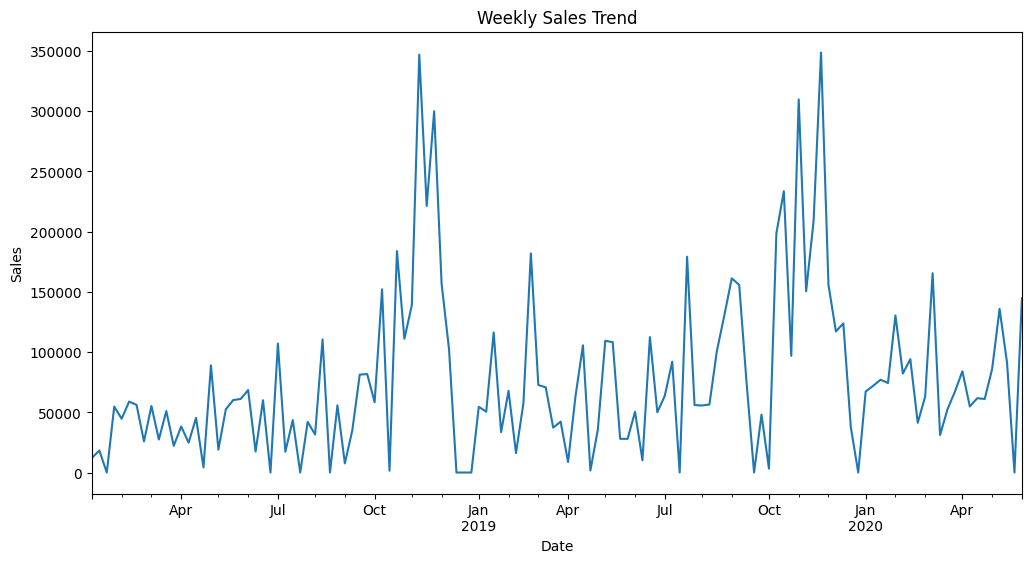

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
sales_data = pd.read_excel("Sales_Data.xlsx")

# Setting the ORDERDATE column as datetime
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'], unit='D', origin='1899-12-30')

# Univariate Analysis: Weekly, Monthly, Quarterly, Yearly Trends in Sales
# Weekly trend
weekly_sales = sales_data.resample('W-Mon', on='ORDERDATE')['SALES'].sum()
plt.figure(figsize=(12, 6))
weekly_sales.plot(title='Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_18212/539524659.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data.resample('M', on='ORDERDATE')['SALES'].sum()


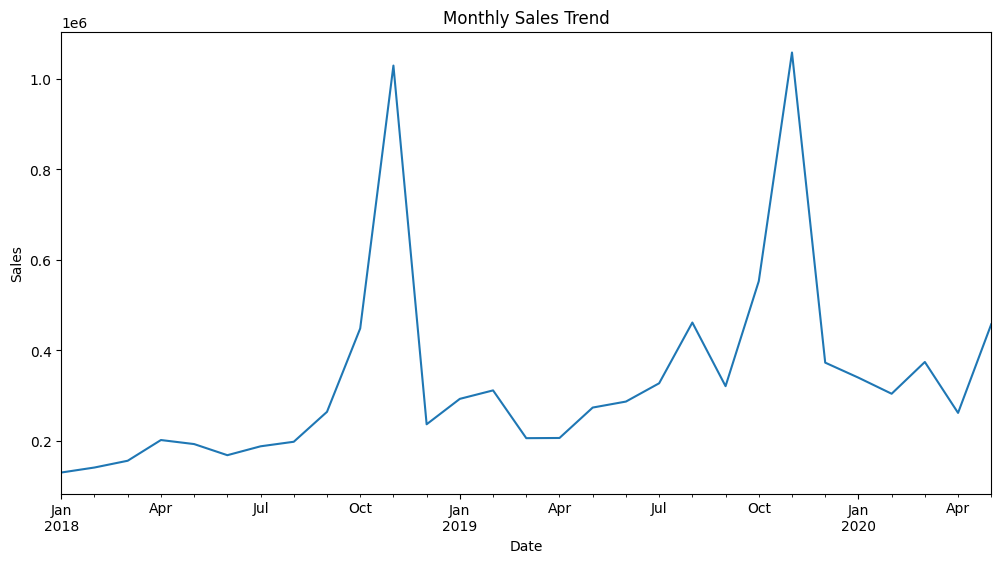

In [8]:
# Monthly trend
monthly_sales = sales_data.resample('M', on='ORDERDATE')['SALES'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_18212/2771848576.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = sales_data.resample('Q', on='ORDERDATE')['SALES'].sum()


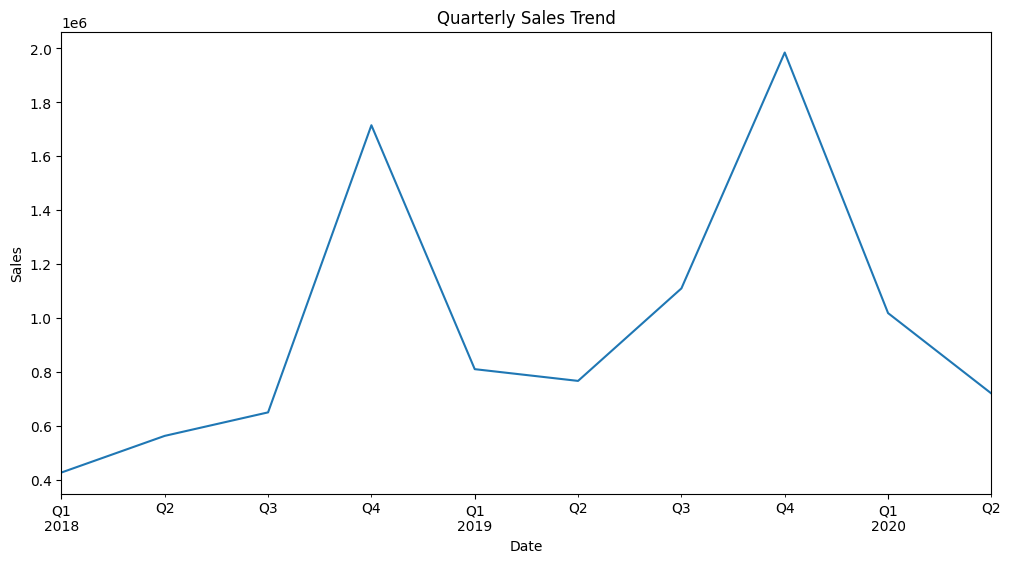

In [9]:
# Quarterly trend
quarterly_sales = sales_data.resample('Q', on='ORDERDATE')['SALES'].sum()
plt.figure(figsize=(12, 6))
quarterly_sales.plot(title='Quarterly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_18212/3522368506.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = sales_data.resample('Y', on='ORDERDATE')['SALES'].sum()


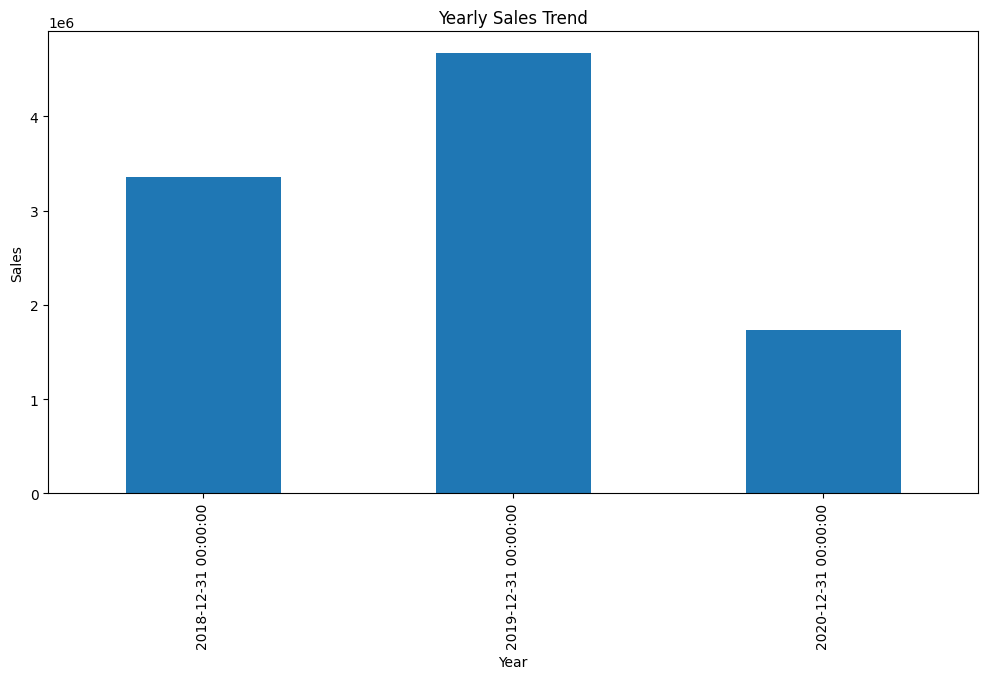

In [10]:
# Yearly trend
yearly_sales = sales_data.resample('Y', on='ORDERDATE')['SALES'].sum()
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar', title='Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()



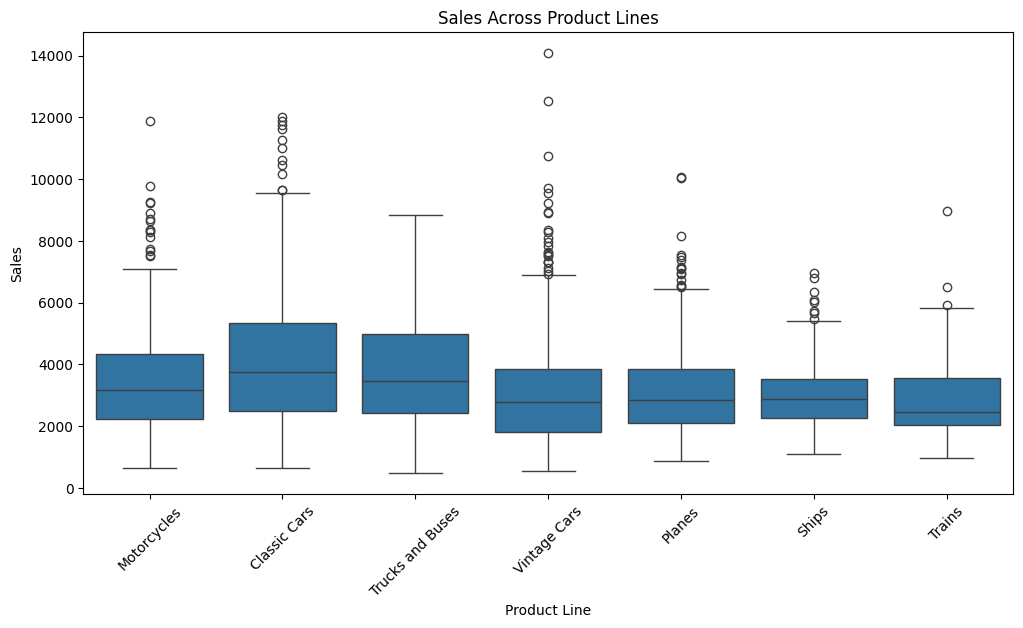

In [11]:
# Bivariate Analysis: Sales Across different Categories
# Sales across product lines
plt.figure(figsize=(12, 6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=sales_data)
plt.title('Sales Across Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()




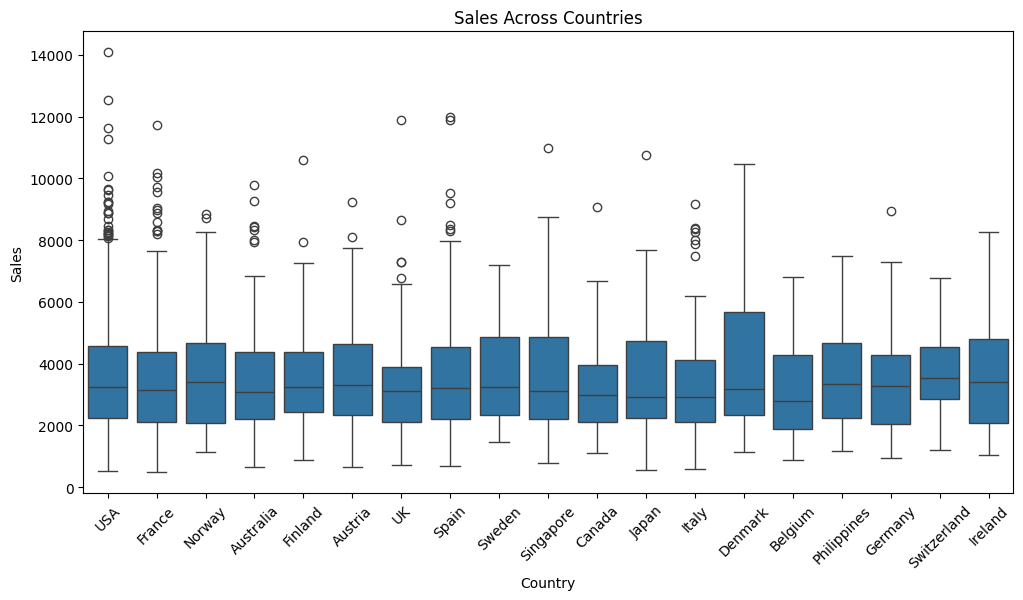

In [12]:
# Sales across other categorical features

plt.figure(figsize=(12, 6))
sns.boxplot(x='COUNTRY', y='SALES', data=sales_data)
plt.title('Sales Across Countries')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()



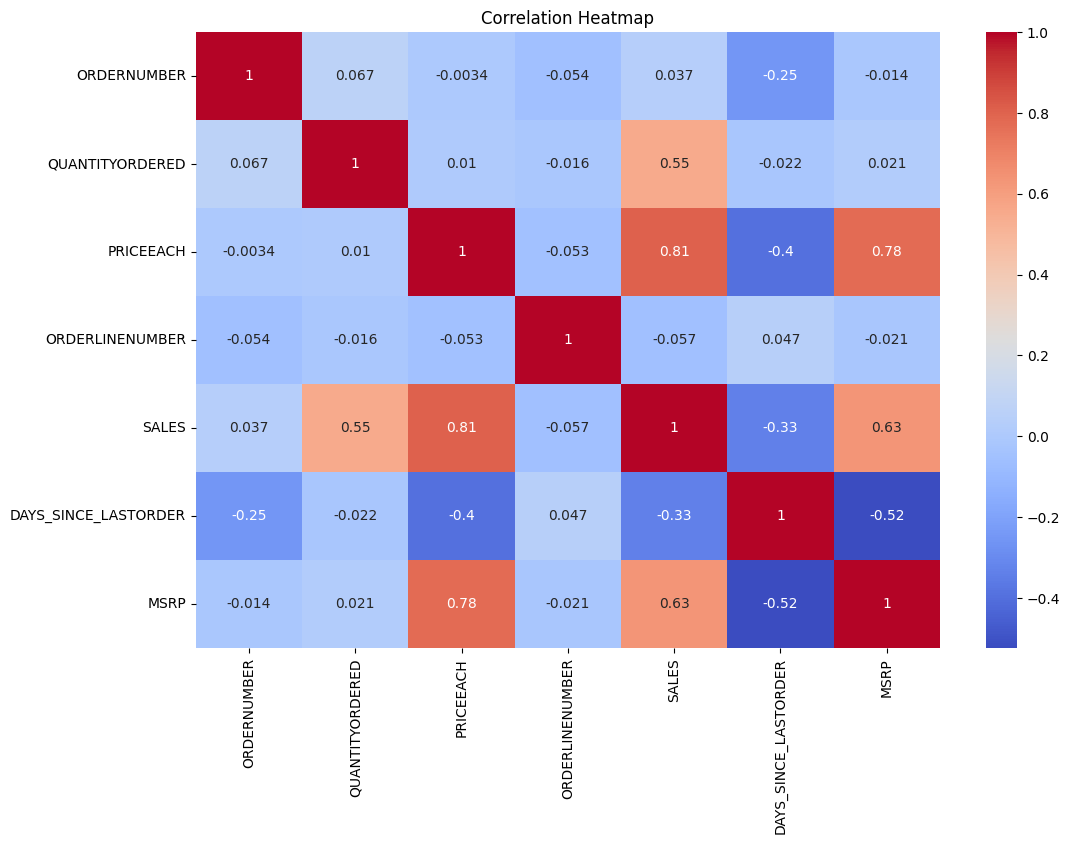

In [14]:
# Dropping non-numeric columns before correlation analysis
numeric_columns = sales_data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
